In [512]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

# Dane
Zostały pobrane z bazy danych: https://www.cars-data.com

Zawierają informacje na temat modeli samochodów różnych marek z różnych lat. Są podane informacje na temat ich cen z różnego okresu, wymiarów, mocy, właściwości ich części i kosztów utrzymania. Pobrałam podstawowe cechy tych pojazdów, nie wchodząc w szczegółowe informacje techniczne. Modele zostały zapisane do plików JSON, a następnie zapisane jako plik CSV. Pełniejsze, interaktywne wizualizacje zostały zawarte w aplikacji internetowej biblioteki **Streamlit**.

Projekt zawiera ponad 4600 obserwacji.

In [513]:
df = pd.read_csv('cars.csv', sep=';')
df.head()

,Unnamed: 0,id,model,years,search,Price:,New Price Roadworthy:,Road Tax / 3 Months:,Body Type:,Transmission:,Drive Wheel :,Engine/motor Type:,Fuel Type:,Power:,Total Max. Power (kW):,Top Speed:,Acceleration 0-100 Km / H:,Practice Consumption Monitor:,Cylinders:,Valves Per Cylinder:,Engine Capacity:,Bore X Stroke:,Compression Ratio:,Urban Consumption:,Extra-urban Consumption:,Combined Consumption:,Co2 Emissions:,Energy Label:,Low Consumption:,Medium Consumption:,High Consumption:,Very High Consumption:,Front Suspension:,Rear Suspension:,Front Stabilizer:,1st Gear:,2nd Gear:,3rd Gear:,4th Gear:,5th Gear:,Curb Weight:,Max. Payload:,Max. Permissible Mass:,Max. Front Axle Mass:,Max. Rear Axle Mass:,Cargo Capacity:,Length Min./max.:,Width Min./max.:,Height:,Height Of Lift Threshold:,Length:,Width:,Wheelbase:,Front Track Width:,Distance Backrest / Pedals:,Front Headroom:,Front Backrest Length:,Front Seat Length:,Front Entry Height:,Crash Test Result:,ABS:,Brake Force Distribution:,Brake Assist:,Emergency Braking Assistance:,Central Door Locking:,Keyless Entry/start:,Start Button:,Control Circuit:,Electric Windows:,Height Adjustment Seat:,Lumbar Support Seat:,Electric Adjustment Seat:,Heated Seats:,Ventilated Seats:,Interval Wiper (s):,Alloy Wheels:,Sliding / Tilting Roof:,Panoramic Roof:,Roof Rails:,Service:,General Warranty:,Body Warranty:,New Price Tax:,New Price 2012:,New Price 2011:,New Price 2010:,New Price 2009:,New Price 2008:,Occasion Price 2012:,Occasion Price 2011:,Occasion Price 2010:,4 Years Depreciation:,Motor Vehicle Tax:,Insurance:,Fuel Costs:,Maintenance:,New Price 2007:,New Price 2006:,New Price 2005:,New Price 2004:,New Price 2014:,New Price 2013:,Occasion Price 2014:,Occasion Price 2013:,New Price 2015:,Occasion Price 2015:,New Price 2003:,New Price 2002:,New Price 2001:,New Price 1982:,New Price 1981:,New Price 1980:,New Price 1979:,New Price 1985:,New Price 1984:,New Price 1983:,New Price 1989:,New Price 1988:,New Price 1987:,New Price 1986:,New Price 1998:,New Price 1997:,New Price 2000:,New Price 1999:,New Price 2016:,Occasion Price 2016:,New Price 1996:,New Price 1995:,New Price 1994:,New Price 1993:,New Price 1992:,New Price 1991:,New Price 1990:,New Price 2017:,Occasion Price 2017:,Engine Type:,Max Power:,Max. Power KW:,Max. Power Hp:,Max Torque:,New Price 1978:,New Price 1977:,New Price 2020:,New Price 2019:,New Price 2018:,Occasion Price 2019:,Occasion Price 2018:,Net Price:,VAT:,BPM (fixed):,Power Consumption:,Battery Range:,Total Max. Power (hp):,Back Door Wxh:
0,0,0,Abarth 500 1.4 16v T-Jet 2008 Manual 3 doors s...,"2008 - 2012\n3 doors, Hatchback",NaN,€ 23.200,NaN,€ 72 - € 80,"3-doors, hatchback",5 speed manual transmission,front,fuel engine,gasoline,99 kw (135 hp),99.0,205 km/h,"7,9 s","6,7 l/100km (1)","4, in line",4,1368 cc,"72,0 x 84,0 mm","10,8 :1","8,5 l/100km","5,4 l/100km",NaN,155 g/km,g,NaN,NaN,NaN,NaN,coil springs,coil springs,yes,"3,91:1","2,24:1","1,52:1","1,16:1","0,87:1",905 kg,465 kg,1370 kg,- kg,- kg,185-610 l,NaN,NaN,1488 mm,700 mm,3546 mm,1627 mm,2300 mm,1413 mm,920-1110 mm,970-970 mm,620 mm,500 mm,630 mm,not tested,yes,yes,yes,NaN,yes,yes,NaN,NaN,yes(front),yes(driver),NaN,NaN,NaN,NaN,yes,yes,NaN,€ 500,NaN,20.000 km / 1 year,"2 year, unlimited",8 year,€ 23.200,€ 23.200,€ 22.425,€ 21.990,€ 21.990,€ 21.990,€ 0,€ 0,€ 0,NaN,€ 24,€ 47,€ 166,€ 48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,432,432,Citroen C3 Picasso 1.4 VTi Seduction 2009 Manu...,"2009 - 2011\n5 doors, MPV",NaN,€ 17.440,NaN,€ 136 - € 152,"5-doors, mpv",5 speed manual transmission,front,fuel engine,gasoline,70 kw (95 hp),70.0,178 km/h,"13,4 s","6,5 l/100km (2)","4, in line",4,1397 cc,"77,0 x 75,0 mm","11,0 :1","8,5 l/100km","5,2 l/100km",NaN,149 g/km,f,NaN,NaN,NaN,NaN,coil springs,torsion bar,yes,"3,42:1","1,80:1","1,28:1","0,98:1","0,77

# Usunięcie części parametrów
W zbiorze znajdują się aż 153 kolumny. Wiele z nich nie ma znaczenia dla starszych lub nowszych modeli. Postaram się zmniejszyć tę liczbę do kolumn, które mogą mieć znaczenie przy przyszłym modelu.

Usuwam kolumnę Unnamed, która jest kopią id

In [514]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,id,model,years,search,Price:,New Price Roadworthy:,Road Tax / 3 Months:,Body Type:,Transmission:,Drive Wheel :,Engine/motor Type:,Fuel Type:,Power:,Total Max. Power (kW):,Top Speed:,Acceleration 0-100 Km / H:,Practice Consumption Monitor:,Cylinders:,Valves Per Cylinder:,Engine Capacity:,Bore X Stroke:,Compression Ratio:,Urban Consumption:,Extra-urban Consumption:,Combined Consumption:,Co2 Emissions:,Energy Label:,Low Consumption:,Medium Consumption:,High Consumption:,Very High Consumption:,Front Suspension:,Rear Suspension:,Front Stabilizer:,1st Gear:,2nd Gear:,3rd Gear:,4th Gear:,5th Gear:,Curb Weight:,Max. Payload:,Max. Permissible Mass:,Max. Front Axle Mass:,Max. Rear Axle Mass:,Cargo Capacity:,Length Min./max.:,Width Min./max.:,Height:,Height Of Lift Threshold:,Length:,Width:,Wheelbase:,Front Track Width:,Distance Backrest / Pedals:,Front Headroom:,Front Backrest Length:,Front Seat Length:,Front Entry Height:,Crash Test Result:,ABS:,Brake Force Distribution:,Brake Assist:,Emergency Braking Assistance:,Central Door Locking:,Keyless Entry/start:,Start Button:,Control Circuit:,Electric Windows:,Height Adjustment Seat:,Lumbar Support Seat:,Electric Adjustment Seat:,Heated Seats:,Ventilated Seats:,Interval Wiper (s):,Alloy Wheels:,Sliding / Tilting Roof:,Panoramic Roof:,Roof Rails:,Service:,General Warranty:,Body Warranty:,New Price Tax:,New Price 2012:,New Price 2011:,New Price 2010:,New Price 2009:,New Price 2008:,Occasion Price 2012:,Occasion Price 2011:,Occasion Price 2010:,4 Years Depreciation:,Motor Vehicle Tax:,Insurance:,Fuel Costs:,Maintenance:,New Price 2007:,New Price 2006:,New Price 2005:,New Price 2004:,New Price 2014:,New Price 2013:,Occasion Price 2014:,Occasion Price 2013:,New Price 2015:,Occasion Price 2015:,New Price 2003:,New Price 2002:,New Price 2001:,New Price 1982:,New Price 1981:,New Price 1980:,New Price 1979:,New Price 1985:,New Price 1984:,New Price 1983:,New Price 1989:,New Price 1988:,New Price 1987:,New Price 1986:,New Price 1998:,New Price 1997:,New Price 2000:,New Price 1999:,New Price 2016:,Occasion Price 2016:,New Price 1996:,New Price 1995:,New Price 1994:,New Price 1993:,New Price 1992:,New Price 1991:,New Price 1990:,New Price 2017:,Occasion Price 2017:,Engine Type:,Max Power:,Max. Power KW:,Max. Power Hp:,Max Torque:,New Price 1978:,New Price 1977:,New Price 2020:,New Price 2019:,New Price 2018:,Occasion Price 2019:,Occasion Price 2018:,Net Price:,VAT:,BPM (fixed):,Power Consumption:,Battery Range:,Total Max. Power (hp):,Back Door Wxh:
0,0,Abarth 500 1.4 16v T-Jet 2008 Manual 3 doors s...,"2008 - 2012\n3 doors, Hatchback",NaN,€ 23.200,NaN,€ 72 - € 80,"3-doors, hatchback",5 speed manual transmission,front,fuel engine,gasoline,99 kw (135 hp),99.0,205 km/h,"7,9 s","6,7 l/100km (1)","4, in line",4,1368 cc,"72,0 x 84,0 mm","10,8 :1","8,5 l/100km","5,4 l/100km",NaN,155 g/km,g,NaN,NaN,NaN,NaN,coil springs,coil springs,yes,"3,91:1","2,24:1","1,52:1","1,16:1","0,87:1",905 kg,465 kg,1370 kg,- kg,- kg,185-610 l,NaN,NaN,1488 mm,700 mm,3546 mm,1627 mm,2300 mm,1413 mm,920-1110 mm,970-970 mm,620 mm,500 mm,630 mm,not tested,yes,yes,yes,NaN,yes,yes,NaN,NaN,yes(front),yes(driver),NaN,NaN,NaN,NaN,yes,yes,NaN,€ 500,NaN,20.000 km / 1 year,"2 year, unlimited",8 year,€ 23.200,€ 23.200,€ 22.425,€ 21.990,€ 21.990,€ 21.990,€ 0,€ 0,€ 0,NaN,€ 24,€ 47,€ 166,€ 48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,432,Citroen C3 Picasso 1.4 VTi Seduction 2009 Manu...,"2009 - 2011\n5 doors, MPV",NaN,€ 17.440,NaN,€ 136 - € 152,"5-doors, mpv",5 speed manual transmission,front,fuel engine,gasoline,70 kw (95 hp),70.0,178 km/h,"13,4 s","6,5 l/100km (2)","4, in line",4,1397 cc,"77,0 x 75,0 mm","11,0 :1","8,5 l/100km","5,2 l/100km",NaN,149 g/km,f,NaN,NaN,NaN,NaN,coil springs,torsion bar,yes,"3,42:1","1,80:1","1,28:1","0,98:1","0,77:1",1176 kg,566 k

In [515]:
df['search'].value_counts()

Series([], Name: count, dtype: int64)

Na pewno muszę usunąć kolumnę **search**, która pojawia się przy scrapingu pomimo tego, że nie posiada żadnych danych. **Id** również nie będzie przydatne, jest inne dla każdej obserwacji. Kolumny z cenami liczą sobie aż 58 kolumn, a przyda się tylko cena obecna.

In [516]:
df = df.drop(columns='search')
df = df.drop(columns='id')
df.columns.str.extract(r'(^.*Price.*$)').count()

0    58
dtype: int64

Kolumn Gear też jest kilka, a patrząc na inne strony internetowe - jest podana tylko ilość biegów samochodu. Stosunki mocy biegów nie wydają się być tak istotne, dlatego można też usunąć te kolumny. 

Należy też oczyścić nazwy kolumn, czyli usunąć dwukropki.

In [517]:
df.columns.str.extract(r'(^.*Gear.*$)').count()

0    5
dtype: int64

In [518]:
import re

for col in df.columns:
    if re.search('Price', col) and col != 'Price:':
        df = df.drop(columns=col)

for col in df.columns:
    tmp = col.rstrip(':')
    df.columns = df.columns.str.replace(col, tmp)

df = df[df.columns.drop(list(df.filter(regex='.*Gear.*')))]
df.columns = df.columns.str.strip()
df.columns

Index(['model', 'years', 'Price', 'Road Tax / 3 Months', 'Body Type',
       'Transmission', 'Drive Wheel', 'Engine/motor Type', 'Fuel Type',
       'Power', 'Total Max. Power (kW)', 'Top Speed',
       'Acceleration 0-100 Km / H', 'Practice Consumption Monitor',
       'Cylinders', 'Valves Per Cylinder', 'Engine Capacity', 'Bore X Stroke',
       'Compression Ratio', 'Urban Consumption', 'Extra-urban Consumption',
       'Combined Consumption', 'Co2 Emissions', 'Energy Label',
       'Low Consumption', 'Medium Consumption', 'High Consumption',
       'Very High Consumption', 'Front Suspension', 'Rear Suspension',
       'Front Stabilizer', 'Curb Weight', 'Max. Payload',
       'Max. Permissible Mass', 'Max. Front Axle Mass', 'Max. Rear Axle Mass',
       'Cargo Capacity', 'Length Min./max.', 'Width Min./max.', 'Height',
       'Height Of Lift Threshold', 'Length', 'Width', 'Wheelbase',
       'Front Track Width', 'Distance Backrest / Pedals', 'Front Headroom',
       'Front Backrest L

W zbiorze jest sporo kolumn z tysiącami brakujących wartości. Postanowiłam usunąć te parametry, których liczba braków jest wyższa niż 500.

In [519]:
df.isnull().sum()

model                       0
years                       0
Price                       0
Road Tax / 3 Months       168
Body Type                   0
                         ... 
BPM (fixed)              4320
Power Consumption        4559
Battery Range            4582
Total Max. Power (hp)    4636
Back Door Wxh            4508
Length: 89, dtype: int64

Liczba parametrów zmniejszyła się do 46.

In [520]:
cols = []
null_values = df.isnull().sum()
for col in df.columns:
    if df[col].isnull().sum() > 500:
        cols.append(col)
df = df.drop(columns=cols)
len(df.columns)

46

# Czyszczenie danych
Należy zamienić kolumnę years na daty początku i końca sprzedaży i wstawić 2024 jako koniec sprzedaży jeśli ten koniec jeszcze nie nastąpił. Należy rozdzielić liczbę drzwi i typ nadwozia. Konieczne jest również wydzielenie marki samochodu z kolumny **model**.

In [521]:
df['years']

0         2008 - 2012\n3 doors, Hatchback
1               2009 - 2011\n5 doors, MPV
2         2004 - 2008\n5 doors, Hatchback
3         2008 - 2009\n5 doors, Hatchback
4         2010 - 2014\n5 doors, Hatchback
                      ...                
4632      2008 - 2009\n3 doors, Hatchback
4633      2002 - 2005\n5 doors, Hatchback
4634      2009 - 2010\n5 doors, Hatchback
4635      2010 - 2011\n5 doors, Hatchback
4636    2003 - 2010\n2 doors, Convertible
Name: years, Length: 4637, dtype: object

In [522]:
df[['Production Start','Production End']] = df.years.str.split(" - ", expand=True)
df[['Production End','Doors']] = df['Production End'].str.split("\n", expand=True)
df[['Doors','Body']] = df['Doors'].str.split(" doors,", expand=True)
df = df.drop(columns='years')
df['model'] = df.apply(lambda x: x.model.split()[0], axis=1)
df.Doors = pd.to_numeric(df.Doors, errors='coerce')
df['Production Start'] = pd.to_numeric(df['Production Start'], errors='coerce')
df['Production End'] = pd.to_numeric(df['Production End'], errors='coerce')
df.head()

,model,Price,Road Tax / 3 Months,Body Type,Transmission,Drive Wheel,Engine/motor Type,Fuel Type,Power,Total Max. Power (kW),Top Speed,Acceleration 0-100 Km / H,Practice Consumption Monitor,Cylinders,Valves Per Cylinder,Engine Capacity,Bore X Stroke,Compression Ratio,Urban Consumption,Extra-urban Consumption,Co2 Emissions,Front Suspension,Rear Suspension,Front Stabilizer,Curb Weight,Max. Payload,Max. Permissible Mass,Max. Front Axle Mass,Max. Rear Axle Mass,Cargo Capacity,Height,Length,Width,Wheelbase,Front Track Width,Crash Test Result,Interval Wiper (s),Service,General Warranty,Body Warranty,4 Years Depreciation,Motor Vehicle Tax,Insurance,Fuel Costs,Maintenance,Production Start,Production End,Doors,Body
0,Abarth,€ 23.200,€ 72 - € 80,"3-doors, hatchback",5 speed manual transmission,front,fuel engine,gasoline,99 kw (135 hp),99.0,205 km/h,"7,9 s","6,7 l/100km (1)","4, in line",4,1368 cc,"72,0 x 84,0 mm","10,8 :1","8,5 l/100km","5,4 l/100km",155 g/km,coil springs,coil springs,yes,905 kg,465 kg,1370 kg,- kg,- kg,185-610 l,1488 mm,3546 mm,1627 mm,2300 mm,1413 mm,not tested,yes,20.000 km / 1 year,"2 year, unlimited",8 year,NaN,€ 24,€ 47,€ 166,€ 48,2008,2012.0,3,Hatchback
1,Citroen,€ 17.440,€ 136 - € 152,"5-doors, mpv",5 speed manual transmission,front,fuel engine,gasoline,70 kw (95 hp),70.0,178 km/h,"13,4 s","6,5 l/100km (2)","4, in line",4,1397 cc,"77,0 x 75,0 mm","11,0 :1","8,5 l/100km","5,2 l/100km",149 g/km,coil springs,torsion bar,yes,1176 kg,566 kg,1742 kg,- kg,- kg,385-1506 l,1631 mm,4078 mm,1766 mm,2540 mm,1466 mm,****,yes(adjustable),30.000 km / 2 year,"2 year, unlimited",12 year,€ 180,€ 45,€ 43,€ 163,€ 47,2009,2011.0,5,MPV
2,Citroen,€ 18.990,€ 136 - € 152,"5-doors, hatchback",5 speed manual transmission,front,fuel engine,gasoline,65 kw (90 hp),65.0,182 km/h,"14,2 s","7,1 l/100km (2)","4, in line",4,1360 cc,"75,0 x 77,0 mm","10,2 :1","8,7 l/100km","5,2 l/100km",153 g/km,coil springs,torsion bar,yes,1157 kg,545 kg,1702 kg,- kg,- kg,350 l,1460 mm,4270 mm,1769 mm,2608 mm,1505 mm,*****,yes(adjustable),30.000 km / 1 year,"2 year, unlimited",12 year,€ 250,€ 45,€ 45,€ 163,€ 47,2004,2008.0,5,Hatchback
3,Citroen,€ 18.790,€ 136 - € 152,"5-doors, hatchback",5 speed manual transmission,front,fuel engine,gasoline,65 kw (90 hp),65.0,182 km/h,"14,2 s",n.b.,"4, in line",4,1360 cc,"75,0 x 77,0 mm","10,2 :1","8,7 l/100km","5,2 l/100km",153 g/km,coil springs,torsion bar,yes,1157 kg,545 kg,1702 kg,- kg,- kg,350 l,1460 mm,4270 mm,1769 mm,2608 mm,1505 mm,*****,yes(adjustable),30.000 km / 1 year,"2 year, unlimited",12 year,€ 246,€ 45,€ 45,€ 163,€ 47,2008,2009.0,5,Hatchback
4,Citroen,€ 21.060,€ 136 - € 152,"5-doors, hatchback",5 speed manual transmission,front,fuel engine,gasoline,70 kw (95 hp),70.0,182 km/h,"11,9 s","6,4 l/100km (2)","4, in line",4,1397 cc,"77,0 x 75,0 mm","11,0 :1","8,2 l/100km","4,9 l/100km",140 g/km,coil springs,torsion bar,yes,1175 kg,545 kg,1720 kg,- kg,- kg,408-1183 l,1489 mm,4329 mm,1789 mm,2608 mm,1536 mm,*****,yes(adjustable),30.000 km / 1 year,"2 year, unlimited",12 year,€ 241,€ 45,€ 48,€ 155,€ 47,2010,2014.0,5,Hatchback


Konieczne jest ustandaryzowanie kolumn z cenami i latami, które powinny być numeryczne. Z kolumny **Road Tax / 3 Months** dodatkowo wyciągam średnią. **Body Type** zostanie usunięte, ponieważ powtarza się z kolumnami **Doors** i **Body**. Tam gdzie występują podwójne jednostki, pozostawię jedną z nich. 

Niektóre kolumny zostaną potem uzupełnione, ale do tego potrzebne będą wartości numeryczne w kolumnach, które aktualnie są typu string. Dlatego uzupełniam te braki zerami.

In [523]:
df.Price = df.apply(lambda x: x.Price.split()[1], axis=1)
df.Price = pd.to_numeric(df.Price, errors='coerce')
df[['x','y','z','a','o']] = df['Road Tax / 3 Months'].str.split(" ", expand=True)
df['y'] = pd.to_numeric(df['y'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
df['o'] = pd.to_numeric(df['o'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
df['Road Tax / 3 Months'] = df[['y', 'o']].mean(axis=1)
df = df.drop(columns=['x','y','z','a','o', 'Body Type'])
df.Power = df.apply(lambda x: x.Power.split()[0], axis=1)
df.Power = pd.to_numeric(df.Power, errors='coerce')
df['Top Speed'] = df.apply(lambda x: x['Top Speed'].split()[0], axis=1)
df['Top Speed'] = pd.to_numeric(df['Top Speed'], errors='coerce')
df['Body Warranty'] = df.apply(lambda x: x['Body Warranty'].split()[0], axis=1)
df['Body Warranty'] = pd.to_numeric(df['Body Warranty'], errors='coerce')
df['Motor Vehicle Tax'] = df.apply(lambda x: x['Motor Vehicle Tax'].split()[1], axis=1)
df['Motor Vehicle Tax'] = pd.to_numeric(df['Motor Vehicle Tax'], errors='coerce')
df.Insurance = df.apply(lambda x: x.Insurance.split()[1], axis=1)
df.Insurance = pd.to_numeric(df.Insurance, errors='coerce')
df['Fuel Costs'] = df.apply(lambda x: x['Fuel Costs'].split()[1], axis=1)
df['Fuel Costs'] = pd.to_numeric(df['Fuel Costs'], errors='coerce')
df.Maintenance = df.apply(lambda x: x.Maintenance.split()[1], axis=1)
df.Maintenance= pd.to_numeric(df.Maintenance, errors='coerce')
df['4 Years Depreciation'] = df['4 Years Depreciation'].fillna('€ 0')
df['4 Years Depreciation'] = df.apply(lambda x: x['4 Years Depreciation'].split()[1], axis=1)
df['4 Years Depreciation'] = pd.to_numeric(df['4 Years Depreciation'], errors='coerce')
df['Acceleration 0-100 Km / H'] = df.apply(lambda x: x['Acceleration 0-100 Km / H'].replace(',','.').split()[0], axis=1)
df['Acceleration 0-100 Km / H'] = pd.to_numeric(df['Acceleration 0-100 Km / H'], errors='coerce')
df['Engine Capacity'] = df['Engine Capacity'].fillna('0 cc')
df['Engine Capacity'] = df.apply(lambda x: x['Engine Capacity'].split()[0], axis=1)
df['Engine Capacity'] = pd.to_numeric(df['Engine Capacity'], errors='coerce')
df['Extra-urban Consumption'] = df['Extra-urban Consumption'].fillna('0 l/100km')
df['Extra-urban Consumption'] = df.apply(lambda x: x['Extra-urban Consumption'].replace(',','.').split()[0], axis=1)
df['Extra-urban Consumption'] = pd.to_numeric(df['Extra-urban Consumption'], errors='coerce')
df['Urban Consumption'] = df['Urban Consumption'].fillna('0 l/100km')
df['Urban Consumption'] = df.apply(lambda x: x['Urban Consumption'].replace(',','.').split()[0], axis=1)
df['Urban Consumption'] = pd.to_numeric(df['Urban Consumption'], errors='coerce')
df['Co2 Emissions'] = df['Co2 Emissions'].fillna('0 g/km')
df['Co2 Emissions'] = df.apply(lambda x: x['Co2 Emissions'].split()[0], axis=1)
df['Co2 Emissions'] = pd.to_numeric(df['Co2 Emissions'], errors='coerce')
df['Curb Weight'] = df.apply(lambda x: x['Curb Weight'].split()[0], axis=1)
df['Curb Weight'] = pd.to_numeric(df['Curb Weight'], errors='coerce')
df['Max. Payload'] = df.apply(lambda x: x['Max. Payload'].split()[0], axis=1)
df['Max. Payload'] = pd.to_numeric(df['Max. Payload'], errors='coerce')
df['Max. Permissible Mass'] = df.apply(lambda x: x['Max. Permissible Mass'].split()[0], axis=1)
df['Max. Permissible Mass'] = pd.to_numeric(df['Max. Permissible Mass'], errors='coerce')
df['Cargo Capacity'] = df.apply(lambda x: x['Cargo Capacity'].split()[0], axis=1)
df['Cargo Capacity'] = pd.to_numeric(df['Cargo Capacity'], errors='coerce')
df.Height = df.apply(lambda x: x.Height.split()[0], axis=1)
df.Height = pd.to_numeric(df.Height, errors='coerce')
df.Length = df.apply(lambda x: x.Length.split()[0], axis=1)
df.Length = pd.to_numeric(df.Length, errors='coerce')
df.Width = df.apply(lambda x: x.Width.split()[0], axis=1)
df.Width = pd.to_numeric(df.Width, errors='coerce')
df.Wheelbase = df.apply(lambda x: x.Wheelbase.split()[0], axis=1)
df.Wheelbase = pd.to_numeric(df.Wheelbase, errors='coerce')
df['Front Track Width'] = df.apply(lambda x: x['Front Track Width'].split()[0], axis=1)
df['Front Track Width'] = pd.to_numeric(df['Front Track Width'], errors='coerce')
df['Valves Per Cylinder'] = pd.to_numeric(df['Valves Per Cylinder'], errors='coerce')

df = df.rename(columns={'model':'Model', 'Road Tax / 3 Months': 'Road Tax', 'Acceleration 0-100 Km / H':'Acceleration','Total Max. Power (kW)':'Total Max. Power',
                        'Interval Wiper (s)':'Interval Wiper'})

df.head(3)

,Model,Price,Road Tax,Transmission,Drive Wheel,Engine/motor Type,Fuel Type,Power,Total Max. Power,Top Speed,Acceleration,Practice Consumption Monitor,Cylinders,Valves Per Cylinder,Engine Capacity,Bore X Stroke,Compression Ratio,Urban Consumption,Extra-urban Consumption,Co2 Emissions,Front Suspension,Rear Suspension,Front Stabilizer,Curb Weight,Max. Payload,Max. Permissible Mass,Max. Front Axle Mass,Max. Rear Axle Mass,Cargo Capacity,Height,Length,Width,Wheelbase,Front Track Width,Crash Test Result,Interval Wiper,Service,General Warranty,Body Warranty,4 Years Depreciation,Motor Vehicle Tax,Insurance,Fuel Costs,Maintenance,Production Start,Production End,Doors,Body
0,Abarth,23.20,76.0,5 speed manual transmission,front,fuel engine,gasoline,99.0,99.0,205.0,7.9,"6,7 l/100km (1)","4, in line",4.0,1368.0,"72,0 x 84,0 mm","10,8 :1",8.5,5.4,155.0,coil springs,coil springs,yes,905.0,465.0,1370.0,- kg,- kg,NaN,1488.0,3546.0,1627.0,2300.0,1413.0,not tested,yes,20.000 km / 1 year,"2 year, unlimited",8.0,0.0,24,47.0,166,48,2008,2012.0,3,Hatchback
1,Citroen,17.44,144.0,5 speed manual transmission,front,fuel engine,gasoline,70.0,70.0,178.0,13.4,"6,5 l/100km (2)","4, in line",4.0,1397.0,"77,0 x 75,0 mm","11,0 :1",8.5,5.2,149.0,coil springs,torsion bar,yes,1176.0,566.0,1742.0,- kg,- kg,NaN,1631.0,4078.0,1766.0,2540.0,1466.0,****,yes(adjustable),30.000 km / 2 year,"2 year, unlimited",12.0,180.0,45,43.0,163,47,2009,2011.0,5,MPV
2,Citroen,18.99,144.0,5 speed manual transmission,front,fuel engine,gasoline,65.0,65.0,182.0,14.2,"7,1 l/100km (2)","4, in line",4.0,1360.0,"75,0 x 77,0 mm","10,2 :1",8.7,5.2,153.0,coil springs,torsion bar,yes,1157.0,545.0,1702.0,- kg,- kg,350.0,1460.0,4270.0,1769.0,2608.0,1505.0,*****,yes(adjustable),30.000 km / 1 year,"2 year, unlimited",12.0,250.0,45,45.0,163,47,2004,2008.0,5,Hatchback


In [524]:
df.isnull().sum()

Model                              0
Price                              0
Road Tax                           0
Transmission                       0
Drive Wheel                        0
Engine/motor Type                  0
Fuel Type                         81
Power                             15
Total Max. Power                  15
Top Speed                         61
Acceleration                     317
Practice Consumption Monitor      78
Cylinders                         78
Valves Per Cylinder               92
Engine Capacity                   16
Bore X Stroke                     78
Compression Ratio                 78
Urban Consumption               1529
Extra-urban Consumption         1527
Co2 Emissions                   1517
Front Suspension                   0
Rear Suspension                    0
Front Stabilizer                   0
Curb Weight                       27
Max. Payload                     214
Max. Permissible Mass            210
Max. Front Axle Mass               0
M

Ponownie usuwam część zbyt często pustych argumentów, których liczba po czyszczeniu wzrosła.

In [525]:
cols = []
null_values = df.isnull().sum()
for col in df.columns:
    if df[col].isnull().sum() > 400:
        cols.append(col)

df = df.drop(columns=cols)

Parametr **Practice Consumption Monitor** zawiera sporo kolumn, które nie są nullem, ale nie zawierają konkretnych danych. Tak samo w przypadku parametru **Max. Front Axle Mass**. Dlatego usuwam te kolumny. Usuwam również wszelkie wymiary, które trzeba by było rozdzielić na kilka kolumn.

In [526]:
df['Max. Front Axle Mass'].value_counts()

Max. Front Axle Mass
- kg       4215
1050 kg      18
1630 kg      15
1550 kg      15
1500 kg      13
           ... 
1162 kg       1
982 kg        1
1011 kg       1
998 kg        1
1140 kg       1
Name: count, Length: 133, dtype: int64

In [527]:
df['Max. Rear Axle Mass'].value_counts()

Max. Rear Axle Mass
- kg       4217
1650 kg      38
1550 kg      13
970 kg       11
1850 kg       8
           ... 
750 kg        1
1435 kg       1
765 kg        1
1370 kg       1
1350 kg       1
Name: count, Length: 153, dtype: int64

In [528]:
df['Bore X Stroke']

0       72,0 x 84,0 mm
1       77,0 x 75,0 mm
2       75,0 x 77,0 mm
3       75,0 x 77,0 mm
4       77,0 x 75,0 mm
             ...      
4632    72,0 x 69,0 mm
4633    72,0 x 69,0 mm
4634    72,0 x 69,0 mm
4635    72,0 x 69,0 mm
4636    75,0 x 77,0 mm
Name: Bore X Stroke, Length: 4637, dtype: object

In [529]:
df['Practice Consumption Monitor']

0       6,7 l/100km (1)
1       6,5 l/100km (2)
2       7,1 l/100km (2)
3                  n.b.
4       6,4 l/100km (2)
             ...       
4632               n.b.
4633               n.b.
4634               n.b.
4635               n.b.
4636    8,1 l/100km (1)
Name: Practice Consumption Monitor, Length: 4637, dtype: object

Ten parametr składa się z dwóch informacji, czyli ilości cylindrów i ich położenia. Na razie zostawiam tę informację jako wartość kategoryczną.

In [530]:
df['Cylinders']

0       4, in line
1       4, in line
2       4, in line
3       4, in line
4       4, in line
           ...    
4632    4, in line
4633    4, in line
4634    4, in line
4635    4, in line
4636    4, in line
Name: Cylinders, Length: 4637, dtype: object

Przy wartościach typu ratio pozostawię pierwszą z liczb w stosunku.

In [531]:
df['Compression Ratio'] = df['Compression Ratio'].fillna('0 :1')
df['Compression Ratio'] = df.apply(lambda x: x['Compression Ratio'].replace(',','.').split()[0], axis=1)
df['Compression Ratio'] = pd.to_numeric(df['Compression Ratio'], errors='coerce')
df['Compression Ratio']

0       10.8
1       11.0
2       10.2
3       10.2
4       11.0
        ... 
4632    10.5
4633    10.5
4634    10.5
4635    10.5
4636    10.5
Name: Compression Ratio, Length: 4637, dtype: float64

Duża ilość nieprzetestowanych samochodów również sprawia, że kolumna **Crash Test Result** zostanie usunięta.

In [532]:
df['Crash Test Result'].value_counts()

Crash Test Result
not tested    2501
*****         1169
****           596
***            251
**              80
*               40
Name: count, dtype: int64

Tutaj wartości mocno się między sobą różnią i nie są ustandaryzowane, np. ilość kilometrów jest określona na rok albo 2 lata. Dlatego tę kolumnę też należy usunąć.

In [533]:
df['Service'].value_counts()

Service
15.000 km / 1 year    1210
10.000 km / 1 year     637
20.000 km / 1 year     623
30.000 km / 1 year     607
variabel / 1 year      304
variabel / 2 year      263
n.b. / 1 year          243
30.000 km / 2 year     241
12.000 km / 1 year     108
16.000 km / 1 year      67
12.500 km / 1 year      45
24.000 km / 1 year      41
40.000 km / 2 year      38
7.500 km / 1 year       38
25.000 km / 1 year      33
n.b. / - year           25
25.000 km / 2 year      24
5.000 km / 1 year       20
26.000 km / 1 year      18
20.000 km / 2 year      15
40.000 km / 1 year      13
60.000 km / 2 year       7
15.000 km / 2 year       5
35.000 km / 1 year       4
34.000 km / 2 year       3
26.000 km / 2 year       2
n.b. / 2 year            2
22.500 km / 1 year       1
Name: count, dtype: int64

In [534]:
df['General Warranty'].value_counts()

General Warranty
2 year, unlimited    1712
1 year, unlimited     993
3 year, unlimited     971
3 year, 100000 km     442
- year, unlimited     244
5 year, unlimited      77
7 year, 150000 km      63
4 year, 100000 km      51
5 year, 200000 km      27
3 year, 150000 km      15
5 year, 100000 km      12
4 year, unlimited       9
- year                  8
5 year, 160000 km       4
8 year, unlimited       3
4 year, 80000 km        3
2 year, 30000 km        1
3 year, 60000 km        1
1 year, 25000 km        1
Name: count, dtype: int64

In [535]:
df = df.drop(columns=['Max. Front Axle Mass', 'Max. Rear Axle Mass', 'Crash Test Result', 'General Warranty', 'Service', 'Practice Consumption Monitor', 'Bore X Stroke'])

Pojawiają się również powtórzenia w kolumnie Body, które należy naprawić.

In [536]:
df['Body'].unique()

array([' Hatchback', ' MPV', ' Coupe', ' SUV', ' Sedan', ' Station wagon',
       ' Passenger bus', ' Van', ' Convertible', ' Pick-up', '  Sedan',
       '  SUV', ' Double cabin'], dtype=object)

In [537]:
df['Body'] = df['Body'].apply(lambda x: x.strip())
df['Body'].unique()

array(['Hatchback', 'MPV', 'Coupe', 'SUV', 'Sedan', 'Station wagon',
       'Passenger bus', 'Van', 'Convertible', 'Pick-up', 'Double cabin'],
      dtype=object)

# Uzupełnienie danych
Aby uzupełnić braki w **4 Years Depreciation**, postanowiono użyć metody group by i wyliczyć średnią według początku produkcji. Okazało się jednak, że niektóre wartości są ujemne, a niektóre lata produkcji mają nieprawidłowe wartości. Należy się tym zająć. Uzupełnię również brakujące wartości kolumny **Engine Capacity**.

In [538]:
import warnings
warnings.filterwarnings('ignore')


def grouped_mean(dataframe, data_col, group_col):
    grouped = dataframe.groupby([group_col],as_index=True, sort=False, group_keys=True)[data_col].mean()
    for i, j in df.loc[dataframe[data_col]==0].iterrows():
        dataframe.loc[dataframe[data_col]==0, data_col] = grouped[dataframe.iloc[[i]][group_col]]

    return dataframe

df = grouped_mean(df, 'Engine Capacity', 'Production Start')
df = grouped_mean(df, '4 Years Depreciation', 'Production Start')

In [539]:
'''
kolumny, w które wstawiłam zera:

4 Years Depreciation
Engine Capacity
Extra-urban Consumption
Urban Consumption
Co2 Emissions
'''

df.describe()

,Price,Road Tax,Power,Total Max. Power,Top Speed,Acceleration,Valves Per Cylinder,Engine Capacity,Compression Ratio,Curb Weight,Max. Payload,Max. Permissible Mass,Height,Length,Width,Wheelbase,Front Track Width,Body Warranty,4 Years Depreciation,Motor Vehicle Tax,Insurance,Fuel Costs,Maintenance,Production Start,Production End,Doors
count,4637.000000,4637.000000,4622.000000,4622.000000,4576.000000,4320.000000,4545.000000,4543.000000,4415.000000,4610.000000,4423.000000,4427.000000,4622.000000,4629.000000,4626.000000,4624.000000,4530.000000,4383.000000,4165.000000,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,4291.000000,4637.000000
mean,39.946194,161.913845,108.010385,108.010385,188.414117,11.517153,3.336194,1979.908871,10.093465,1310.228416,557.273118,1863.350576,1499.103202,4394.457982,1760.161262,2626.624351,1497.752318,8.155601,273.596855,42.290921,76.490718,203.875135,54.002157,2002.387535,2003.643673,4.009489
std,57.303789,108.125940,81.426427,81.426427,38.392486,3.761155,0.949228,1049.275107,2.111804,378.418264,148.334229,469.779718,184.303137,442.715537,111.341630,217.896300,95.700603,3.604218,205.862405,44.222774,81.451218,72.700365,15.856357,11.799945,11.089929,1.120595
min,0.000000,0.000000,12.000000,12.000000,80.000000,2.500000,0.000000,599.000000,0.000000,474.000000,155.000000,690.000000,1012.000000,339.000000,1300.000000,216.000000,19.000000,0.000000,-21.000000,0.000000,0.000000,20.000000,25.000000,1969.000000,1980.000000,2.000000
25%,13.949000,98.500000,59.250000,59.250000,162.000000,9.300000,2.000000,1343.000000,9.400000,1020.000000,475.000000,1525.000000,1395.000000,4125.000000,1690.000000,2480.000000,1436.000000,6.000000,131.000000,0.000000,36.000000,158.000000,44.000000,1994.000000,1996.000000,3.000000
50%,23.594000,144.000000,81.000000,81.000000,180.000000,11.600000,4.000000,1598.000000,10.000000,1260.000000,540.000000,1795.000000,1446.000000,4431.000000,1761.000000,2620.000000,1503.000000,7.000000,225.000000,38.000000,54.000000,194.000000,48.000000,2004.000000,2005.000000,4.000000
75%,40.704000,212.000000,120.000000,120.000000,205.000000,13.900000,4.000000,1999.000000,10.500000,1533.250000,615.000000,2100.000000,1559.750000,4703.000000,1834.000000,2751.000000,1560.000000,12.000000,359.000000,59.000000,82.000000,235.000000,59.000000,2012.000000,2013.000000,5.000000
max,909.770000,760.000000,736.000000,736.000000,407.000000,40.000000,5.000000,8277.000000,22.000000,2903.000000,1500.000000,3901.000000,2815.000000,6960.000000,2070.000000,4325.000000,1810.000000,30.000000,995.000000,245.000000,997.000000,635.000000,181.000000,2021.000000,2020.000000,5.000000


W przypadku kolumn, w które wstawiłam zera, kolumn z brakującymi wartościami numerycznymi, lub innych zerowych kolumn, w puste miejsca wstawiam średnią atrybutów. W **Compression Ratio** wartości zerowe zamieniam na najbliższą, wyższą wartość.

Jeśli chodzi o zmienne kategoryczne, puste miejsca zastępuję modą.

In [540]:
df['Fuel Type'] = df['Fuel Type'].fillna(df['Fuel Type'].mode()[0])
df['Interval Wiper'] = df['Interval Wiper'].fillna(df['Interval Wiper'].mode()[0])
df['Body Warranty'] = df['Body Warranty'].fillna(df['Body Warranty'].mode()[0])
df['Cylinders'] = df['Cylinders'].fillna(df['Cylinders'].mode()[0])

nulls = df.isnull().sum().reset_index()
nulls = nulls.loc[nulls[0]!=0]
for x in nulls['index']:
    df[x] = df[x].fillna(df[x].mean())

df.loc[df['Compression Ratio'] <= 0, 'Compression Ratio'] = min(filter(lambda x: x > 0, df["Compression Ratio"]))

In [541]:
df.describe()

,Price,Road Tax,Power,Total Max. Power,Top Speed,Acceleration,Valves Per Cylinder,Engine Capacity,Compression Ratio,Curb Weight,Max. Payload,Max. Permissible Mass,Height,Length,Width,Wheelbase,Front Track Width,Body Warranty,4 Years Depreciation,Motor Vehicle Tax,Insurance,Fuel Costs,Maintenance,Production Start,Production End,Doors
count,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000,4637.000000
mean,39.946194,161.913845,108.010385,108.010385,188.414117,11.517153,3.336194,1979.908871,10.211214,1310.228416,557.273118,1863.350576,1499.103202,4394.457982,1760.161262,2626.624351,1497.752318,8.366185,273.596855,42.290921,76.490718,203.875135,54.002157,2002.387535,2003.643673,4.009489
std,57.303789,108.125940,81.294591,81.294591,38.139068,3.630289,0.939762,1038.583027,1.636830,377.314703,144.870191,459.016454,184.004735,442.333392,111.209460,217.590579,94.589760,3.611655,195.101536,44.222774,81.451218,72.700365,15.856357,11.799945,10.668066,1.120595
min,0.000000,0.000000,12.000000,12.000000,80.000000,2.500000,0.000000,599.000000,7.000000,474.000000,155.000000,690.000000,1012.000000,339.000000,1300.000000,216.000000,19.000000,0.000000,-21.000000,0.000000,0.000000,20.000000,25.000000,1969.000000,1980.000000,2.000000
25%,13.949000,98.500000,60.000000,60.000000,162.000000,9.500000,2.000000,1351.000000,9.500000,1020.000000,480.000000,1540.000000,1395.000000,4129.000000,1690.000000,2480.000000,1440.000000,6.000000,141.000000,0.000000,36.000000,158.000000,44.000000,1994.000000,1997.000000,3.000000
50%,23.594000,144.000000,82.000000,82.000000,180.000000,11.517153,4.000000,1598.000000,10.000000,1265.000000,545.000000,1820.000000,1446.000000,4430.000000,1760.161262,2620.000000,1500.000000,8.000000,250.000000,38.000000,54.000000,194.000000,48.000000,2004.000000,2004.000000,4.000000
75%,40.704000,212.000000,120.000000,120.000000,205.000000,13.700000,4.000000,1998.000000,10.500000,1530.000000,610.000000,2075.000000,1557.000000,4702.000000,1834.000000,2751.000000,1558.000000,12.000000,342.000000,59.000000,82.000000,235.000000,59.000000,2012.000000,2013.000000,5.000000
max,909.770000,760.000000,736.000000,736.000000,407.000000,40.000000,5.000000,8277.000000,22.000000,2903.000000,1500.000000,3901.000000,2815.000000,6960.000000,2070.000000,4325.000000,1810.000000,30.000000,995.000000,245.000000,997.000000,635.000000,181.000000,2021.000000,2020.000000,5.000000


Z racji tego, że kolumna **Total Max. Power (kW)** wydaje się być identyczna co **Power [kw]**, usunę pierwszą z nich.

Widać, że wartości null zostały usunięte.

In [542]:
df = df.drop(columns='Total Max. Power')
df = df.dropna()
df.isnull().sum()

Model                    0
Price                    0
Road Tax                 0
Transmission             0
Drive Wheel              0
Engine/motor Type        0
Fuel Type                0
Power                    0
Top Speed                0
Acceleration             0
Cylinders                0
Valves Per Cylinder      0
Engine Capacity          0
Compression Ratio        0
Front Suspension         0
Rear Suspension          0
Front Stabilizer         0
Curb Weight              0
Max. Payload             0
Max. Permissible Mass    0
Height                   0
Length                   0
Width                    0
Wheelbase                0
Front Track Width        0
Interval Wiper           0
Body Warranty            0
4 Years Depreciation     0
Motor Vehicle Tax        0
Insurance                0
Fuel Costs               0
Maintenance              0
Production Start         0
Production End           0
Doors                    0
Body                     0
dtype: int64

# Analiza i wizualizacje


Sprawdzam ile występuje różnych typów atrybutów i jaki jest ich rozkład.

In [543]:
import plotly.express as px

def graph_number(col):
    frame = df[col].str.get_dummies()
    fig = px.bar(frame.sum(), labels={"index": col, "value":"count"}, title="Count of "+col)
    fig.update_layout(showlegend=False, xaxis={'categoryorder':'total descending'})
    fig.show()

In [544]:
graph_number('Model')

In [545]:
graph_number('Transmission')

In [546]:
graph_number('Drive Wheel')

In [547]:
graph_number('Engine/motor Type')

In [548]:
graph_number('Fuel Type')

In [549]:
graph_number('Cylinders')

In [550]:
graph_number('Front Suspension')

In [551]:
graph_number('Rear Suspension')

In [552]:
graph_number('Front Stabilizer')

In [553]:
graph_number('Interval Wiper')

In [554]:
graph_number('Body')

Okazuje się, że ze wszystkich pozostałych kolumn kategorycznych istotne będą wyłącznie **Model**, **Drive Wheel**, **Interval Wiper**, **Interval Wiper**, **Body**. Resztę można usunąć ze zbioru.

A teraz sprawdzam jak wygląda wykres liczby body samochodów według lat ich początków produkcji. Najpierw utworzę przedziały lat, aby pozbyć się nadmiaru informacji.

In [555]:
df.loc[df['Production Start'] <= 1980,  'Production Start Group'] = '1969 - 1980'
df.loc[(df['Production Start'] > 1980) & (df['Production Start'] <= 1990),  'Production Start Group'] = '1981 - 1990'
df.loc[(df['Production Start'] > 1990) & (df['Production Start'] <= 2000),  'Production Start Group'] = '1991 - 2000'
df.loc[(df['Production Start'] > 2000) & (df['Production Start'] <= 2010),  'Production Start Group'] = '2000 - 2010'
df.loc[(df['Production Start'] > 2010),  'Production Start Group'] = '2010 - present'

In [556]:
df = df.reset_index()
df.to_csv('app/datasets/complete_cars.csv')
df.select_dtypes(include=['object']).columns
df = df.drop(columns=['Transmission', 'Engine/motor Type','Fuel Type', 'Cylinders', 'Front Suspension', 'Rear Suspension', 'Front Stabilizer'])

Widać, że przez lata na rynku królowały Hatchbacki i Sedany, a ostatnio Sedany przestały się cieszyć taką popularnością. Zostały znacząco wyprzedzone przez SUV. Pojawiły się również nowe ciała, które wcześniej nie istniały.

In [557]:
df = df.sort_values(by=["Production Start Group"])

fig = px.histogram(df, "Body", facet_col="Production Start Group",
             color="Production Start Group",
             title="Counts of Education level per Age",
             height=1500,
             facet_col_wrap=1,
             facet_col_spacing=0.1)

fig.update_layout(showlegend=False)
fig.update_xaxes(showticklabels=True, tickangle=50)
fig.update_yaxes(matches=None, showticklabels=True)

Teraz sprawdzę wykresy pudełkowe dla zmiennych numerycznych. Widać, że ciała Coupe potrafią kosztować najwięcej, a ich koszty mają spore wahania. Przeciwieństwem jest tutaj model Double-cabin. Pick-up z kolei nie posiada wartości odstających, a jego ceny są najbardziej stabilne.

In [558]:
df = df[(df["Price"] != 0)]
fig = px.box(df, "Body", "Price")
fig.show()

Widać, że wraz z czasem, moc silników samochodowych rosła.

In [559]:
df = df[(df["Power"] != 0)]
fig = px.box(df, "Production Start Group", "Power")
fig.show()

Na wykresie widać, że cena pojazdów również gwałtownie rosła na przestrzeni lat, co może mieć związek z inflacją.

In [560]:
df = df.sort_values(["Production Start"])
fig = px.line(df, x="Production Start", y="Price", title='Price of cars per year')
fig.show()

Rozkłady gęstości zmiennych są nierównomierne, więc przy modelowaniu będą potrzebowały skalowania. Widać pewne spore dysproporcje, w szczególności w zmiennej **4 Years Depreciation**. **Valves per Cylinder** wydaje się być kolumną kompletnie nieprzydatną, więc może zostać zignorowana.

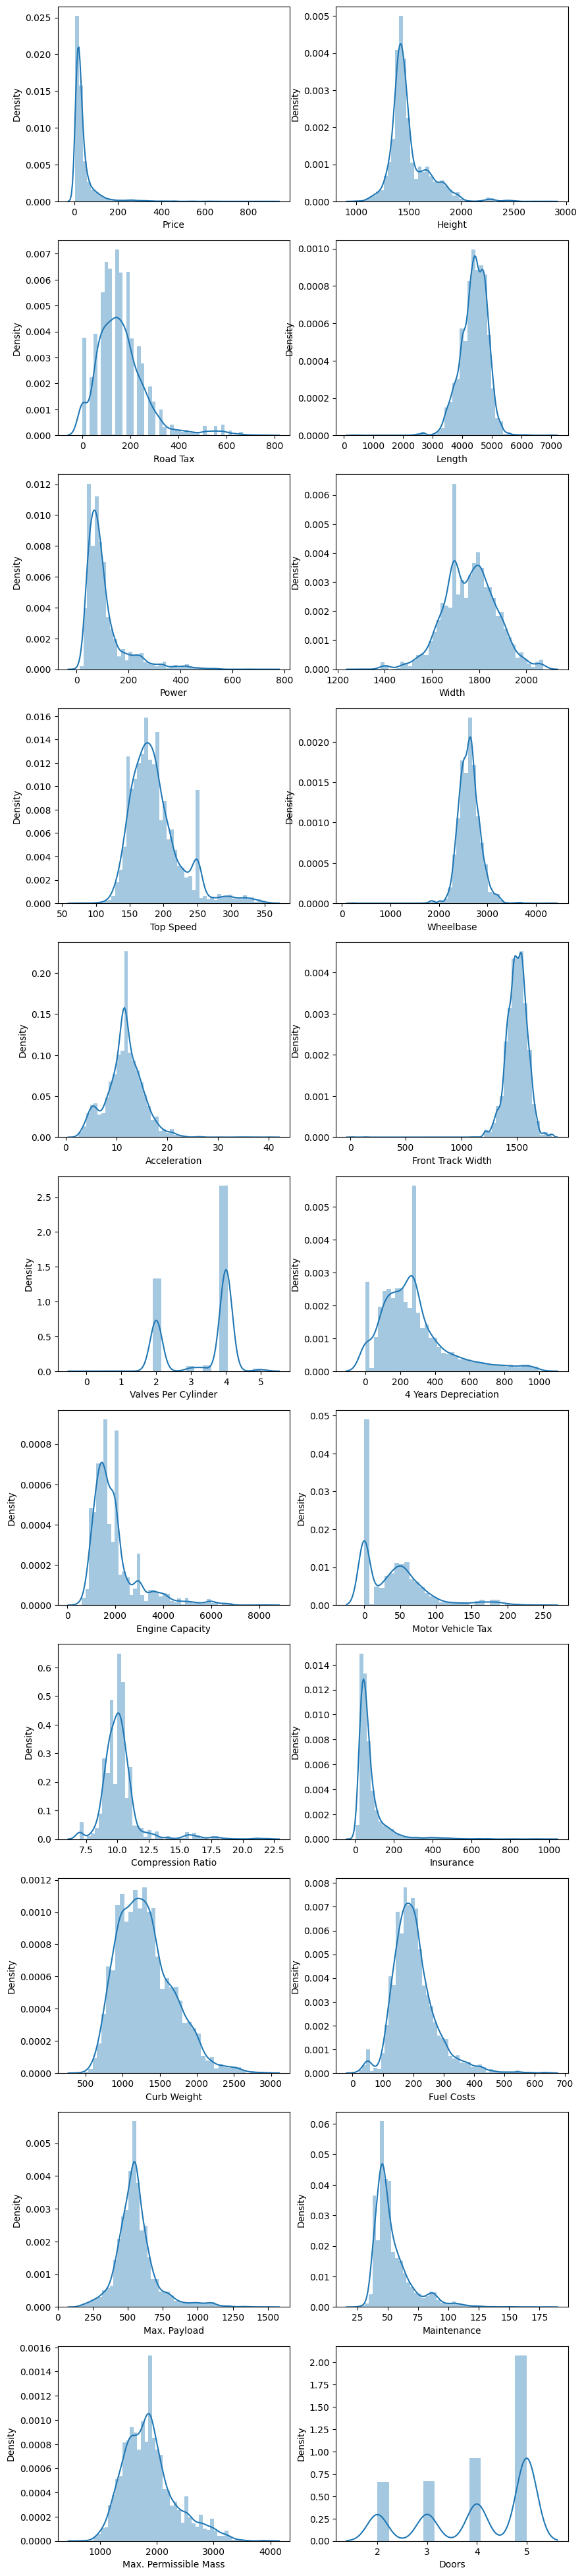

In [561]:
import matplotlib.pyplot as plt
import seaborn as sns

col_to_dist = ['Price', 'Road Tax', 'Power','Top Speed', 'Acceleration','Valves Per Cylinder', 'Engine Capacity', 'Compression Ratio',
               'Curb Weight', 'Max. Payload', 'Max. Permissible Mass','Height', 'Length', 'Width', 'Wheelbase','Front Track Width','4 Years Depreciation',
              'Motor Vehicle Tax', 'Insurance','Fuel Costs', 'Maintenance', 'Doors']

cols1 = col_to_dist[0:11]
cols2 = col_to_dist[11:]
fig,axes=plt.subplots(11,2, figsize=(10,50))
for n in range(11):
       sns.distplot(df[cols1[n]],ax=axes[n, 0],axlabel=cols1[n])
       sns.distplot(df[cols2[n]],ax=axes[n, 1],axlabel=cols2[n])
plt.show()

In [562]:
df = df.drop(columns=['Valves Per Cylinder', 'Production Start Group', 'Production End'])

# Modelowanie
Zdecydowałam się zbadać zachowanie predykcji zmiennej **Power** dla nowych danych.

Najpierw zacznę od ustalenia korelacji pomiędzy zmiennymi numerycznymi. W ten sposób wybiorę część danych, które będą mogły wpłynąć na najdokładniejszą predykcję. Dlatego utworzę kolumny dummy. Przy okazji usuwam z nazw kolumn znaki, które mogą sprawić problem bibliotece **statsmodels**.

Widać, że Akceleracja wyraźnie odstaje od innych zmiennych, z którymi ma prawie wyłącznie ujemną korelację.

<Axes: >

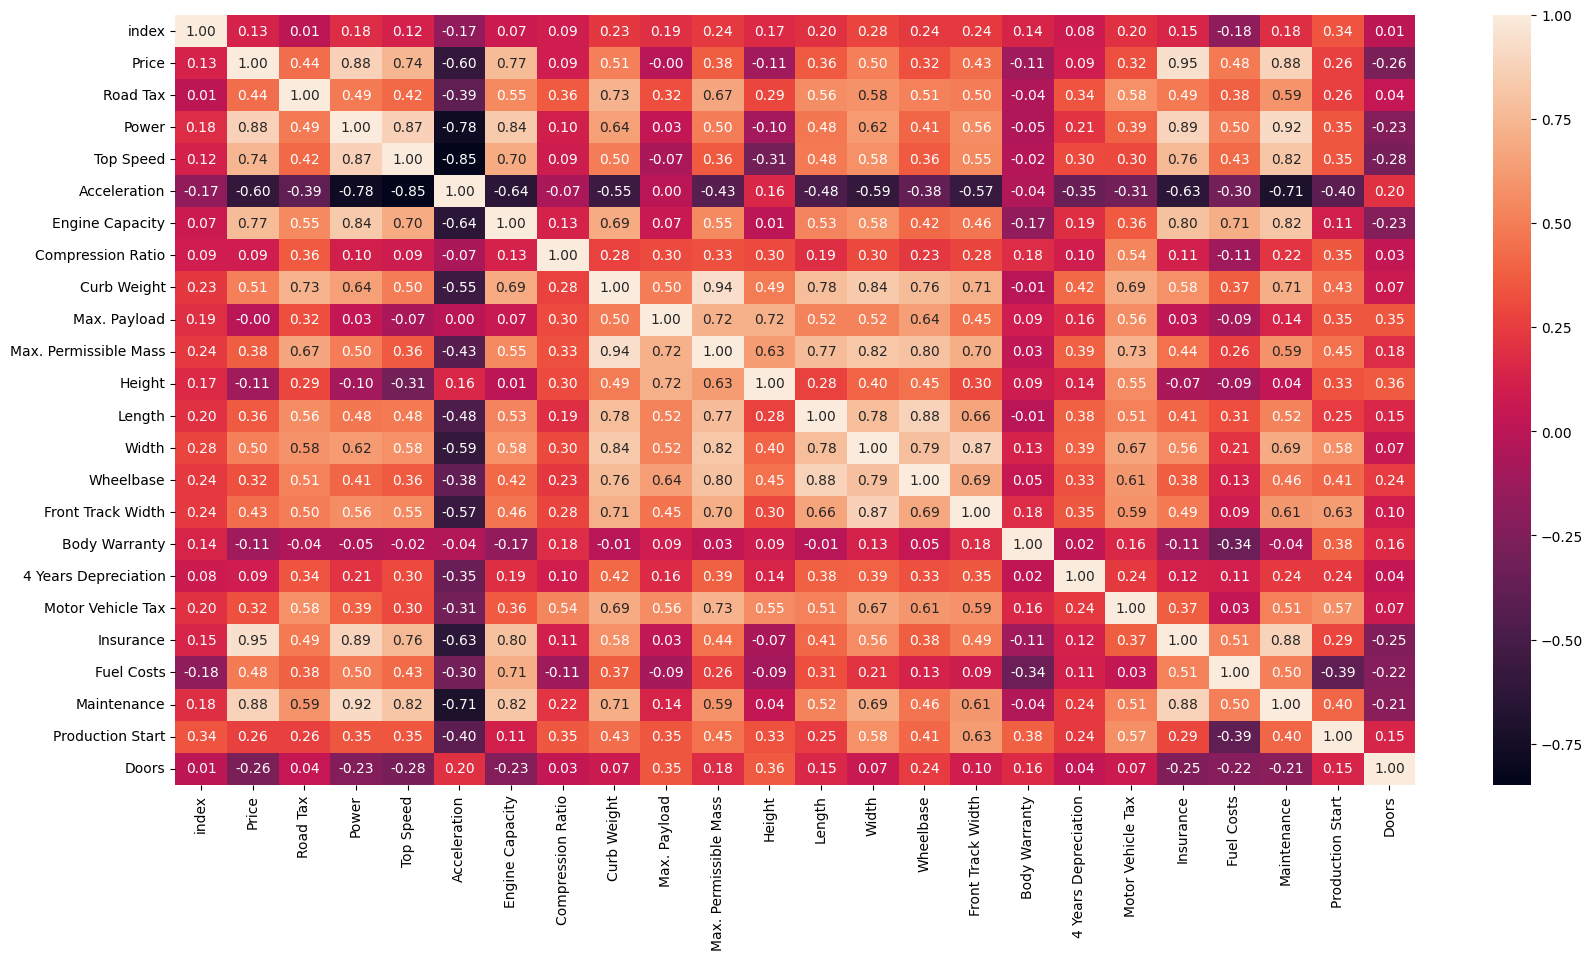

In [563]:
fig = plt.figure(figsize=(20,10), dpi = 100)
sns.heatmap(df.corr(numeric_only=True), annot = True, fmt = '.2f')

Skaluję dane i dzielę je na zbiór treningowy i testowy.

In [564]:
from sklearn.preprocessing import MinMaxScaler
import pickle

cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.loc[:, ~df.columns.isin(cat_cols)].columns
df = pd.concat([df[num_cols], pd.get_dummies(df[cat_cols], dtype=int)], axis=1)
df = df.reset_index()
df = df.drop(columns='index')
y = df.pop('Power')
scaler = MinMaxScaler()
scaler.fit(df)
newdf_1 = scaler.transform(df)
newdf = pd.DataFrame(newdf_1, index=df.index, columns=df.columns)
newdf.columns = newdf.columns.str.strip()
newdf.columns = newdf.columns.str.replace(' ','')
newdf.columns = newdf.columns.str.replace(',','_')
newdf.columns = newdf.columns.str.replace('/','_')
newdf.columns = newdf.columns.str.replace('.','_')
newdf.columns = newdf.columns.str.replace('-','_')
newdf.columns = newdf.columns.str.replace('+','_plus_')
newdf.columns = newdf.columns.str.replace('(','')
newdf.columns = newdf.columns.str.replace(')','')
newdf.columns = newdf.columns.str.replace('2','two_')
newdf.columns = newdf.columns.str.replace('3','three_')
newdf.columns = newdf.columns.str.replace('4','four_')
newdf.columns = newdf.columns.str.replace('5','five_')
newdf.columns = newdf.columns.str.replace('6','six_')
newdf.columns = newdf.columns.str.replace('7','seven_')
newdf.columns = newdf.columns.str.replace('8','eight_')
newdf.columns = newdf.columns.str.replace('9','nine_')

newdf.insert(len(newdf.columns), "Power", y)
pickle.dump(newdf, open('app/datasets/newdf.pkl', 'wb'))
newdf.head(3)

,level_0,Price,RoadTax,TopSpeed,Acceleration,EngineCapacity,CompressionRatio,CurbWeight,Max_Payload,Max_PermissibleMass,Height,Length,Width,Wheelbase,FrontTrackWidth,BodyWarranty,four_YearsDepreciation,MotorVehicleTax,Insurance,FuelCosts,Maintenance,ProductionStart,Doors,Model_Abarth,Model_Aiways,Model_Alfa,Model_Alpine,Model_Asia,Model_Aston,Model_Audi,Model_Austin,Model_Autobianchi,Model_BMW,Model_Bentley,Model_Buick,Model_Cadillac,Model_Carver,Model_Chevrolet,Model_Chrysler,Model_Citroen,Model_Corvette,Model_Cupra,Model_DS,Model_Dacia,Model_Daewoo,Model_Daihatsu,Model_Daimler,Model_Datsun,Model_Dodge,Model_Donkervoort,Model_FSO,Model_Ferrari,Model_Fiat,Model_Fisker,Model_Ford,Model_Galloper,Model_Honda,Model_Hummer,Model_Hyundai,Model_Infiniti,Model_Innocenti,Model_Iveco,Model_Jaguar,Model_Jeep,Model_Josse,Model_Kia,Model_Lada,Model_Lamborghini,Model_Lancia,Model_Land,Model_Landwind,Model_Lexus,Model_Lincoln,Model_Lotus,Model_MG,Model_Marcos,Model_Maserati,Model_Maybach,Model_Mazda,Model_McLaren,Model_Mclaren,Model_Mega,Model_Mercedes_Benz,Model_Mercury,Model_Mini,Model_Mitsubishi,Model_Morgan,Model_Morris,Model_Nissan,Model_Noble,Model_Opel,Model_PGO,Model_Peugeot,Model_Polestar,Model_Pontiac,Model_Porsche,Model_Princess,Model_Renault,Model_Rolls_Royce,Model_Rover,Model_Saab,Model_Seat,Model_Skoda,Model_Smart,Model_Spectre,Model_Ssangyong,Model_Subaru,Model_Suzuki,Model_TVR,Model_Talbot,Model_Tesla,Model_Think,Model_Toyota,Model_Triumph,Model_Volkswagen,Model_Volvo,Model_Yugo,DriveWheel_front,DriveWheel_front_plus_rear,DriveWheel_rear,IntervalWiper_yes,IntervalWiper_yesadjustable,IntervalWiper_yeswithrainsensor,Body_Convertible,Body_Coupe,Body_Doublecabin,Body_Hatchback,Body_MPV,Body_Passengerbus,Body_Pick_up,Body_SUV,Body_Sedan,Body_Stationwagon,Body_Van,Power
0,0.763374,0.001586,0.047368,0.148148,0.840000,0.000391,0.133333,0.051873,0.130112,0.074743,0.292845,0.533303,0.259740,0.531516,0.692909,0.033333,0.041247,0.0,0.015926,0.312195,0.070513,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0
1,0.993960,0.001611,0.047368,0.129630,0.866667,0.000391,0.100000,0.035406,0.159851,0.074743,0.326123,0.527262,0.233766,0.531516,0.692909,0.033333,0.039235,0.0,0.014922,0.312195,0.070513,0.019231,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21.0
2,0.712252,0.008343,0.159868,0.296296,0.320000,0.180516,0.146667,0.265953,0.211896,0.270944,0.237382,0.625434,0.506494,0.549769,0.771078,0.400000,0.121730,0.0,0.031992,0.390244,0.108974,0.038462,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,74.0


In [565]:
from statsmodels.formula.api import ols

df1 = set(newdf.columns)
df1.remove('Power')
selected = []
current_score, best_new_score = 0.0, 0.0
while df1 and current_score == best_new_score:
    scores_with_candidates = []
    for candidate in df1:
        formula = "{} ~ {} + 1".format('Power', ' + '.join(selected + [candidate]))
        score = ols(formula, newdf).fit().rsquared_adj
        scores_with_candidates.append((score, candidate))
    scores_with_candidates.sort()
    best_new_score, best_candidate = scores_with_candidates.pop()
    if current_score <= best_new_score:
        df1.remove(best_candidate)
        selected.append(best_candidate)
        current_score = best_new_score

formula = "{} ~ {} + 1".format('Power', ' + '.join(selected))
model = ols(formula, newdf).fit()
selected.append('Power')

print(model.model.formula)
print(model.rsquared_adj)

Power ~ Maintenance + TopSpeed + Insurance + DriveWheel_front_plus_rear + EngineCapacity + FuelCosts + CompressionRatio + Model_Ferrari + Model_Mclaren + Model_Rolls_Royce + RoadTax + IntervalWiper_yeswithrainsensor + Price + Model_Polestar + Acceleration + four_YearsDepreciation + Model_Mercedes_Benz + Model_Maybach + CurbWeight + Model_BMW + Length + ProductionStart + Wheelbase + Model_Aston + Body_Convertible + Height + Body_MPV + Model_McLaren + DriveWheel_rear + Model_Bentley + Model_Porsche + Model_Subaru + level_0 + Model_Renault + Model_Fisker + Model_Mini + Body_Pick_up + Model_Daimler + Model_Kia + Body_Coupe + Model_Cadillac + Model_Volkswagen + Model_Tesla + Model_Iveco + Model_Fiat + Model_Hyundai + Model_Lexus + Model_Audi + Model_Land + Model_Ssangyong + Model_Carver + Width + Model_Morgan + Model_Spectre + Model_Hummer + Model_Lotus + Model_FSO + Model_Lada + Max_Payload + Max_PermissibleMass + Model_Noble + Model_Dacia + Model_Talbot + Model_Daihatsu + Model_Pontiac + 

Model wybrał za pomocą automatycznego Feature Selection zmienne, które mają największe znaczenie przy predykcji mocy pojazdu. Wynik modelu wynosi aż 0.95 $R^2$, co ma sens, ponieważ na macierzy korelacji sporo zmiennych miało wysoką korelację ze zmienną zależną.

In [566]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Power   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     1019.
Date:                Tue, 04 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:25:16   Log-Likelihood:                -19457.
No. Observations:                4595   AIC:                         3.911e+04
Df Residuals:                    4499   BIC:                         3.972e+04
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          22.9518      5.694      4.031      0.000      11.789      34.114
Maintenance                       133.0313      9.436     14.098      0.000     114.532     151.531
TopSpeed                          167.7507      6.712     24.993      0.000     154.592     180.909
Insurance                         156.6511     11.527     13.590      0.000     134.053     179.249
DriveWheel_front_plus_rear         23.2794      2.003     11.622      0.000      19.352      27.207
EngineCapacity                    138.3865      5.624     24.606      0.000     127.361     149.412
FuelCosts                         -73.3148      5.498    -13.335      0.000     -84.093     -62.536
CompressionRatio                  -22.1225      3.185     -6.946      0.000     -28.367     -15.878
Model_Ferrari                      35.0523      3.814      9.189      0.000      27.574      42.530
Model_Mclaren                      64.5919      6.230     10.367      0.000      52.377      76.806
Model_Rolls_Royce                 -97.2036      6.909    -14.069      0.000    -110.749     -83.658
RoadTax                           -39.5457      4.061     -9.738      0.000     -47.507     -31.584
IntervalWiper_yeswithrainsensor    12.9903      2.052      6.331      0.000       8.968      17.013
Price                             186.3259     15.047     12.383      0.000     156.826     215.826
Model_Polestar                     91.0845     12.320      7.393      0.000      66.932     115.237
Acceleration                      -59.6682      6.046     -9.869      0.000     -71.522     -47.815
four_YearsDepreciation            -11.1549      1.583     -7.047      0.000     -14.258      -8.052
Model_Mercedes_Benz               -13.9353      1.461     -9.535      0.000     -16.801     -11.070
Model_Maybach                    -120.4931     13.311     -9.052      0.000    -146.590     -94.396
CurbWeight                        111.4989     10.036     11.109      0.000      91.823     131.175
Model_BMW                         -15.2298      1.658     -9.183      0.000     -18.481     -11.979
Length                           -135.7993     12.871    -10.551      0.000    -161.033    -110.566
ProductionStart                   -19.8242      2.774     -7.147      0.000     -25.262     -14.387
Wheelbase                         108.5132     15.105      7.184      0.000      78.900     138.126
Model_Aston                       -28.9399      3.900     -7.420      0.000     -36.586     -21.294
Body_Convertible                   -7.1622      1.447     -4.949      0.000      -9.999      -4.325
Height                            -39.0716      6.705     -5.827      0.000     -52.218     -25.926
Body_MPV                            9.2596      1.150      8.050      0.000       7

Poniższe wykresy przedstawiają dokładność regresji na przykładzie zmiennej, z którą **Power** ma największą korelację. Widać, że punkty zmiennych bardzo dobrze pokrywają się ze sobą.

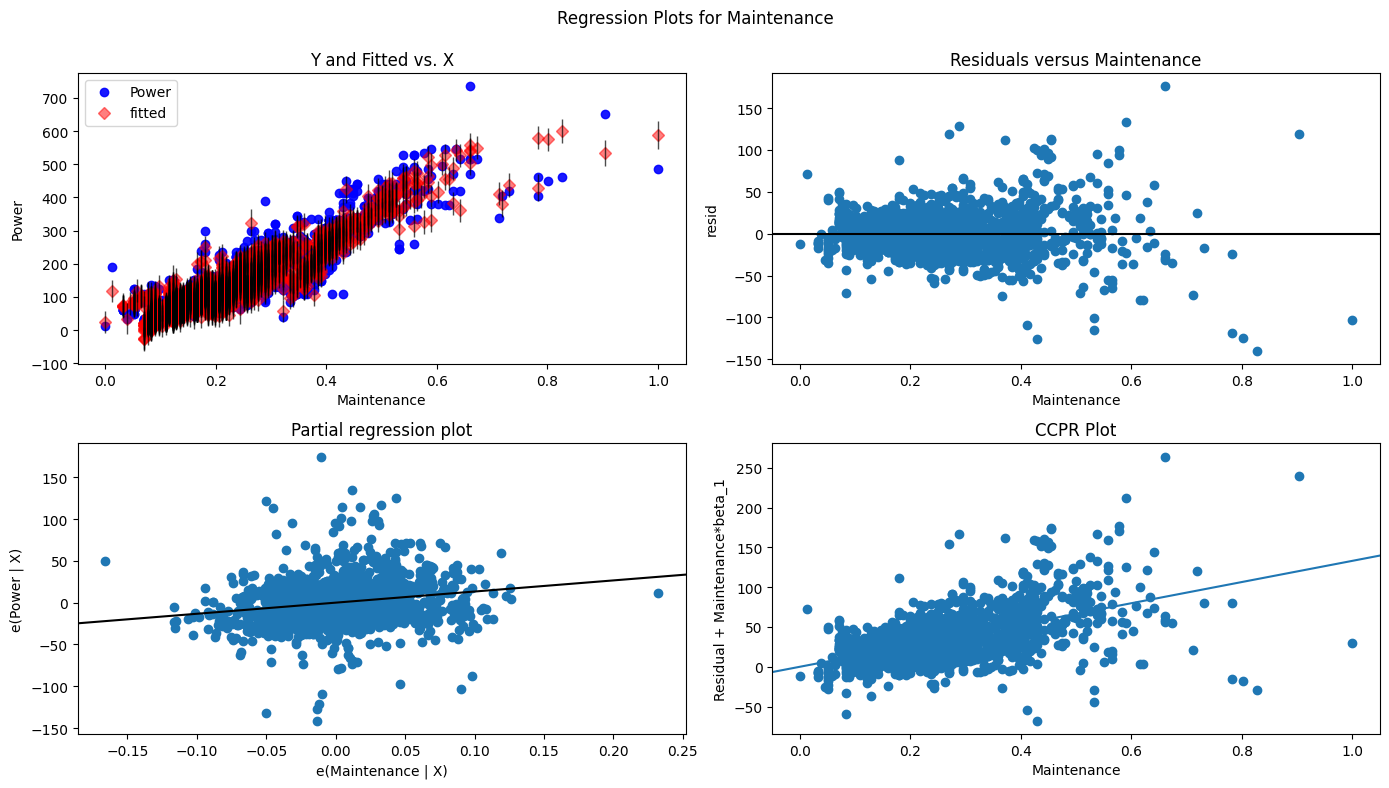

In [567]:
import statsmodels.api as sm

fig = plt.figure(figsize=(14, 8)) 

fig = sm.graphics.plot_regress_exog(model, 'Maintenance', fig=fig) 

W taki sposób wyglądają reszty modelu dla zmiennej Maintenance. Wariancja nie odchyla się wraz ze zmieniającymi się zmiennymi, więc model ma większą szansę na poprawne przewidywanie.

<Axes: xlabel='Maintenance', ylabel='Power'>

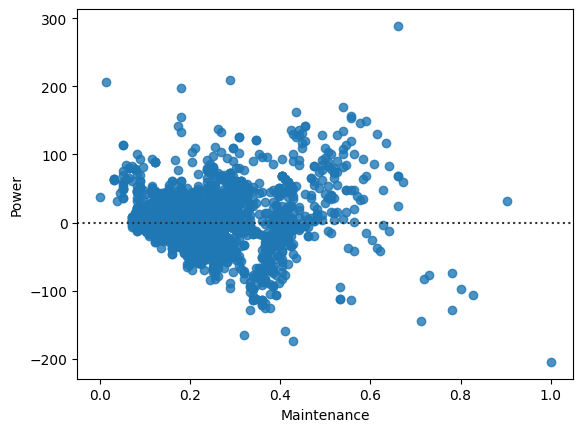

In [568]:
sns.residplot(x='Maintenance', y='Power', data=newdf)

In [569]:
model.predict(newdf.iloc[5])

5    23.560806
dtype: float64

In [570]:
import pickle

pickle.dump(model, open('app/models/model.pkl', 'wb'))

Sprawdzam jeszcze dwa modele z walidacją krzyżową, czyli LassoCV i RidgeCV. Użyję do nich parametrów wybranych przez OLS. Na początek rozdzielam zbiór na treningowy i testowy.

In [571]:
from sklearn.model_selection import train_test_split

cols = list(model.params.reset_index()['index'])
cols.remove('Intercept')
#newdf = newdf.drop(columns='level_0')
X = newdf[cols]
y = newdf['Power']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

Wybieram parametry alpha i sprawdzam jak wygląda dokładność przy najlepszym alpha.

In [572]:
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error
import numpy as np

alphas = np.arange(0.00001, 0.1, 0.001) 
reg_lasso = LassoCV(alphas=alphas, cv=5, random_state=0).fit(X_train, y_train)
y_pred = reg_lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred)
reg_lasso.score(X_test, y_test)

0.9394036171842074

In [573]:
reg_lasso.alpha_

1e-05

In [574]:
reg_ridge = RidgeCV(alphas=alphas, cv=5).fit(X_train, y_train)
y_pred = reg_lasso.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred)
reg_ridge.score(X_test, y_test)

0.93943916141853

In [575]:
reg_ridge.alpha_

0.00101

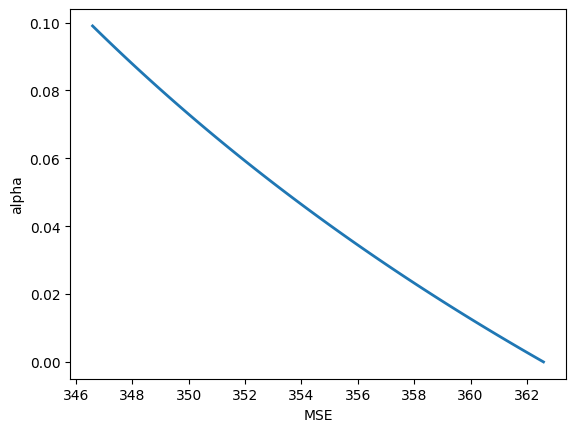

In [576]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge

mse = []
for i in alphas:
    l2 = Ridge(alpha=i)
    l2.fit(X_train, y_train)
    y_pred = l2.predict(X_test)
    mse.append(mean_squared_error(y_test, y_pred))

plt.plot(mse, alphas, linewidth=2)
plt.xlabel('MSE')
plt.ylabel('alpha')
plt.show()

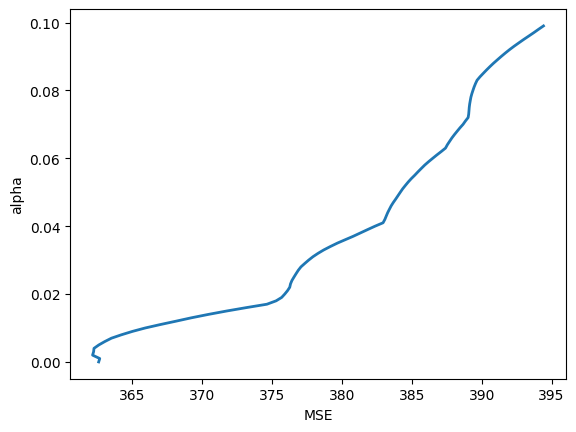

In [577]:
mse = []
for i in alphas:
    l2 = Lasso(alpha=i)
    l2.fit(X_train, y_train)
    y_pred = l2.predict(X_test)
    mse.append(mean_squared_error(y_test, y_pred))

plt.plot(mse, alphas, linewidth=2)
plt.xlabel('MSE')
plt.ylabel('alpha')
plt.show()

Tak wyglądają wybrane kolumny przez model LassoCV.

In [578]:
print([X.columns[i] for i in range(len(X.columns)) if reg_lasso.coef_[i] != 0.0])

['Maintenance', 'TopSpeed', 'Insurance', 'DriveWheel_front_plus_rear', 'EngineCapacity', 'FuelCosts', 'CompressionRatio', 'Model_Ferrari', 'Model_Mclaren', 'Model_Rolls_Royce', 'RoadTax', 'IntervalWiper_yeswithrainsensor', 'Price', 'Model_Polestar', 'Acceleration', 'four_YearsDepreciation', 'Model_Mercedes_Benz', 'Model_Maybach', 'CurbWeight', 'Model_BMW', 'Length', 'ProductionStart', 'Wheelbase', 'Model_Aston', 'Body_Convertible', 'Height', 'Body_MPV', 'Model_McLaren', 'DriveWheel_rear', 'Model_Bentley', 'Model_Porsche', 'Model_Subaru', 'level_0', 'Model_Renault', 'Model_Fisker', 'Model_Mini', 'Body_Pick_up', 'Model_Daimler', 'Model_Kia', 'Body_Coupe', 'Model_Cadillac', 'Model_Volkswagen', 'Model_Tesla', 'Model_Iveco', 'Model_Fiat', 'Model_Hyundai', 'Model_Lexus', 'Model_Audi', 'Model_Land', 'Model_Ssangyong', 'Model_Carver', 'Width', 'Model_Morgan', 'Model_Spectre', 'Model_Hummer', 'Model_Lotus', 'Model_FSO', 'Model_Lada', 'Max_Payload', 'Max_PermissibleMass', 'Model_Noble', 'Model_D

Modele okazują się mieć bardzo podobną dokładność - na poziomie 93%. Dlatego wybiorę pierwszy model - LassoCV, jako model główny, służący do predykcji.

In [579]:
pickle.dump(reg_lasso, open('main_model.pkl', 'wb'))